# Load Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import random_split, DataLoader
import time

from sklearn.model_selection import train_test_split


In [2]:
my_root_path = "/content/cifar10"                                            # data 저장 위치.
my_model_repo = "/content/drive/MyDrive/Classroom/AI Programming/pretrained" # model 저장 위치.

# Trainset과 Testset 생성.

1. cifar10 의 10가지 종류

In [3]:
class_names = ['airplane', 'car',
               'bird', 'cat',
               'deer', 'dog',
               'frog', 'horse',
               'ship', 'truck']

2. cifar10을 다운로드
3. train과 test를 위한 Dataset 생성.
  * `torch.tensor`로 변환.
  * `standaradization`을 수행.

In [4]:
data_path = os.path.join('dataset')

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(
        #     (0.4915, 0.4823, 0.4468),
        #     (0.2470, 0.2435, 0.2616)
        # )
    ]
)

cifar10_train = datasets.CIFAR10(
    data_path,
    train = True,
    download = True,
    transform = transform,
)

cifar10_test = datasets.CIFAR10(
    data_path,
    train = False,
    download = True,
    transform = transform,
)

100%|██████████| 170M/170M [00:03<00:00, 48.6MB/s]


In [5]:
cifar10_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
cifar10_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [7]:
print(f'{type(transform)     = }')
print(f'{type(cifar10_train) = }')
print(f'{type(cifar10_test)  = }')

type(transform)     = <class 'torchvision.transforms.transforms.Compose'>
type(cifar10_train) = <class 'torchvision.datasets.cifar.CIFAR10'>
type(cifar10_test)  = <class 'torchvision.datasets.cifar.CIFAR10'>


In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    cifar10_train.data, cifar10_train.targets, test_size=0.2, random_state=42
)


# StandardScaler를 사용하여 데이터를 표준화합니다.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
N_train, C, H, W = x_train.shape
N_val = x_val.shape[0]

train_data = x_train.reshape((N_train, -1))
val_data = x_val.reshape((N_val, -1))
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
x_train = train_data.reshape((N_train, C, H, W))
x_val = val_data.reshape((N_val, C, H, W))


import torch.utils.data as data

train_set = data.TensorDataset(torch.tensor(x_train).permute(0,3,1,2).float(),
                               torch.tensor(y_train).long())
validation_set  = data.TensorDataset(torch.tensor(x_val).permute(0,3,1,2).float(),
                                     torch.tensor(y_val).long())

In [9]:
batch_size = 32
n_worker = 0
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = n_worker,
)

valid_loader = torch.utils.data.DataLoader(
    validation_set,
    batch_size = batch_size,
    shuffle = False,
    num_workers = n_worker,
)

test_loader = torch.utils.data.DataLoader(
    cifar10_test,
    batch_size = batch_size,
    shuffle = False,
    num_workers = n_worker,
)

In [10]:
print(f"Train dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(valid_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")

Train dataset size: 40000
Validation dataset size: 10000
Test dataset size: 10000


type(grid_img)=<class 'torch.Tensor'>
max_val.item()=1.0
min_val.item()=0.0


(np.float64(-0.5), np.float64(273.5), np.float64(137.5), np.float64(-0.5))

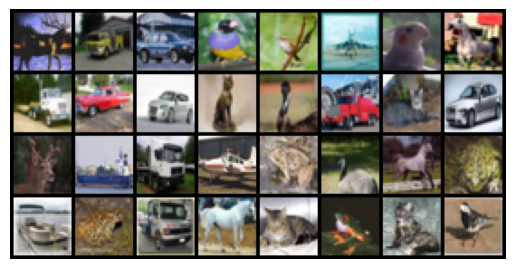

In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

grid_img = torchvision.utils.make_grid(images)
max_val = torch.max(grid_img)
min_val = torch.min(grid_img)
print(f'{type(grid_img)=}\n{max_val.item()=}\n{min_val.item()=}')

normalized_grid_img = (grid_img - min_val) / (max_val - min_val)
plt.imshow(np.transpose(normalized_grid_img, (1,2,0)))
plt.axis('off')

# Train Loop

In [ ]:
# from tqdm.auto import tqdm

# def train_loop (
#     n_epoch,
#     train_loader, val_loader,
#     model, optimizer, loss_fnc,
#     device = 'cpu',):

#   log_hist = torch.zeros([0,3]).to(device)
#   tmp = torch.empty((1, 3), device=log_hist.device)

#   model = model.to(device)
#   start_time = time.time()  # iteration 시작 시간 기록
#   best_loss_val = float('inf')
#   best_model_wts = None

#   for epoch in tqdm(range(n_epoch)):
#     # print(f'\r{epoch:6>}', end='')

#     model.train()
#     for x_tensor, y_tensor in train_loader:

#       x_tensor = x_tensor.to(device)
#       y_tensor = y_tensor.to(device)
#     #   x_tensor.to(device)
#     #   y_tensor.to(device)

#       y_pred = model(x_tensor)
#       # print(y_tensor.shape)
#       loss_train = loss_fnc(y_pred,y_tensor)

#       if torch.isinf(loss_train):
#         print(f'Error: loss is infinity!')
#         break

#       optimizer.zero_grad()
#       loss_train.backward()
#       optimizer.step()

#     with torch.no_grad():
#       model.eval()
#       for x_tensor, y_tensor in val_loader:
#         x_tensor = x_tensor.to(device)
#         y_tensor = y_tensor.to(device)
#         pred = model(x_tensor)
#         loss_val = loss_fnc(pred, y_tensor)

#     if loss_val < best_loss_val:
#         best_loss_val = loss_val
#         print(f'best model wts at {epoch} : {loss_val = }')
#         best_model_wts = model.state_dict()

#     if epoch % 5 == 0:

#       # tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
#       tmp[0, 0] = epoch
#       tmp[0, 1] = loss_train.item()
#       tmp[0, 2] = loss_val.item()

#       # print(tmp)
#       log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
#       end_time = time.time()  # iteration 종료 시간 기록
#       iteration_time = (end_time - start_time)  # 소요 시간을 초 단위로 계산
#       print(f'{epoch+1}/{n_epoch} Epoch [{iteration_time:.2f}s]/ loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

#       start_time = time.time()  # iteration 시작 시간 기록

#     if epoch == n_epoch-1:
#       tmp[0, 0] = epoch
#       tmp[0, 1] = loss_train.item()
#       tmp[0, 2] = loss_val.item()
#       end_time = time.time()  # iteration 종료 시간 기록
#       iteration_time = (end_time - start_time)  # 소요 시간을 초 단위로 계산
#       print(f'{epoch+1}/{n_epoch} Epoch [{iteration_time:.2f}s] / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

#   return best_model_wts,log_hist

In [12]:
import torch
import time
import copy
import os
from pathlib import Path
from typing import Optional, Tuple, Dict, Any, Union
from tqdm import tqdm


def train_loop(
    n_epoch: int,                                   # 총 훈련할 epoch 수 (전체 데이터셋을 몇 번 반복할지)
    train_loader: torch.utils.data.DataLoader,      # 훈련 데이터를 배치 단위로 제공하는 DataLoader
    val_loader: torch.utils.data.DataLoader,        # 검증 데이터를 배치 단위로 제공하는 DataLoader
    model: torch.nn.Module,                         # 훈련할 신경망 모델 (nn.Module을 상속받은 클래스)
    optimizer: torch.optim.Optimizer,               # 가중치 업데이트를 담당하는 옵티마이저 (SGD, Adam 등)
    loss_fnc: Optional[torch.nn.Module] = None,     # 손실함수 (MSELoss, CrossEntropyLoss 등) - HF 모델이 아닌 경우 필수
    device: str = 'cpu',                            # 연산을 수행할 디바이스 ('cpu' 또는 'cuda')
    print_every: int = 5,                           # 몇 epoch마다 진행상황을 출력할지 결정
    early_stop_patience: Optional[int] = None,      # Early stopping: 몇 epoch 동안 개선이 없으면 중단할지
    save_best_model: bool = True,                   # 최고 성능의 모델 가중치를 저장할지 여부
    save_best_model_to_file: bool = False,          # 최고 성능 모델을 파일로 저장할지 여부
    best_model_path: Optional[str] = None,          # 최고 성능 모델을 저장할 파일 경로
    verbose: bool = True,                           # 상세한 출력을 할지 여부 (False면 조용히 훈련)
) -> Tuple[torch.nn.Module, torch.Tensor, Optional[torch.nn.Module]]:
    """
    개선된 PyTorch 훈련 루프 - 일반 PyTorch 모델과 Hugging Face Transformers 모델 모두 지원

    이 함수는 딥러닝 모델의 전체 훈련 과정을 관리함.

    지원하는 모델 타입:
    1. 일반 PyTorch 모델: DataLoader가 (input, target) 튜플을 반환하고 별도 loss 함수 필요
    2. Hugging Face Transformers 모델: DataLoader가 딕셔너리를 반환하고 모델이 loss를 직접 계산

    훈련은 다음과 같은 단계로 진행됩니다:
    1. 모델을 훈련 모드로 설정
    2. 훈련 데이터로 순전파(forward pass) 수행
    3. 손실 계산 (모델 타입에 따라 자동 감지)
    4. 역전파(backward pass)로 그래디언트 계산
    5. 옵티마이저로 가중치 업데이트
    6. 검증 데이터로 모델 성능 평가
    7. 로그 기록 및 조기 종료 조건 확인
    8. 최고 성능 모델 저장 (메모리 및/또는 파일)

    Args:
        n_epoch:                 총 훈련 epoch 수 (한 epoch = 전체 훈련 데이터를 한 번 모두 보는 것)
        train_loader:            훈련 데이터 로더 (배치 크기만큼 데이터를 자동으로 제공)
        val_loader:              검증 데이터 로더 (모델의 일반화 성능을 측정하기 위함)
        model:                   훈련할 모델 (신경망의 구조와 가중치를 포함)
        optimizer:               옵티마이저 (그래디언트를 이용해 가중치를 어떻게 업데이트할지 결정)
        loss_fnc:                손실 함수 (일반 PyTorch 모델의 경우 필수, HF 모델의 경우 선택)
        device:                  연산 디바이스 (GPU 사용시 훈련 속도가 크게 향상됨)
        print_every:             로그 출력 간격 (너무 자주 출력하면 성능에 영향)
        early_stop_patience:     조기 종료 기준 (과적합 방지 및 훈련 시간 절약)
        save_best_model:         최고 성능 모델 저장 (검증 손실이 가장 낮았던 시점의 모델)
        save_best_model_to_file: 최고 성능 모델을 파일로 저장할지 여부 (True시 best_model_path 필요)
        best_model_path:         최고 성능 모델을 저장할 파일/디렉토리 경로
        verbose:                 상세 출력 여부 (디버깅이나 모니터링 시 유용)

    Returns:
        tuple containing:
        - 훈련이 완료된 모델 (마지막 epoch의 가중치)
        - 로그 히스토리 텐서 (각 epoch의 훈련/검증 손실 기록)
        - 최고 성능 모델 (검증 손실이 가장 낮았던 모델, save_best_model=True일 때만)

    Examples:
        # 일반 PyTorch 모델 - 메모리에만 저장
        model, history, best_model = train_loop(
            n_epoch=100,
            train_loader=train_loader,
            val_loader=val_loader,
            model=my_model,
            optimizer=optimizer,
            loss_fnc=nn.CrossEntropyLoss(),
            device='cuda'
        )

        # 일반 PyTorch 모델 - 파일로도 저장
        model, history, best_model = train_loop(
            n_epoch=100,
            train_loader=train_loader,
            val_loader=val_loader,
            model=my_model,
            optimizer=optimizer,
            loss_fnc=nn.CrossEntropyLoss(),
            device='cuda',
            save_best_model_to_file=True,
            best_model_path='./checkpoints/best_model.pth'
        )

        # Hugging Face Transformers 모델 - 파일로도 저장
        model, history, best_model = train_loop(
            n_epoch=10,
            train_loader=train_loader,
            val_loader=val_loader,
            model=bert_model,
            optimizer=optimizer,
            device='cuda',
            save_best_model_to_file=True,
            best_model_path='./checkpoints/best_bert_model'  # 디렉토리 경로
        )
    """

    # =================================================================
    # 1단계: 초기 설정 및 변수 초기화
    # =================================================================

    # 파일 저장 관련 유효성 검사
    if save_best_model_to_file and best_model_path is None:
        raise ValueError("save_best_model_to_file=True인 경우 best_model_path를 반드시 지정해야 합니다.")

    # 파일 저장 경로 준비
    if save_best_model_to_file and best_model_path is not None:
        # 디렉토리 생성 (존재하지 않는 경우)
        save_path = Path(best_model_path)
        if _is_transformers_model(model):
            # HF 모델의 경우 디렉토리 경로
            save_path.mkdir(parents=True, exist_ok=True)
        else:
            # 일반 PyTorch 모델의 경우 파일 경로의 부모 디렉토리
            save_path.parent.mkdir(parents=True, exist_ok=True)

    # 모델을 지정된 디바이스(CPU 또는 GPU)로 이동
    model = model.to(device)

    # 훈련 과정의 손실값들을 기록할 리스트 초기화
    log_hist = []

    # Early stopping 관련 변수들 초기화
    best_val_loss    = float('inf')   # 지금까지 가장 좋은(낮은) 검증 손실값
    best_model       = None           # 최고 성능을 보인 모델의 가중치 저장용
    patience_counter = 0              # 성능 개선이 없었던 연속 epoch 수 카운터

    # 전체 훈련 시작 시간 기록
    total_start_time = time.time()

    if verbose:
        print(f"훈련 시작: {n_epoch} epoch, 디바이스: {device}")
        print("-" * 60)

    # =================================================================
    # 2단계: 메인 훈련 루프 시작
    # =================================================================

    try:
        for epoch in range(n_epoch):
            epoch_start_time = time.time()

            # =============================================================
            # 2-1단계: 훈련(Training) 단계
            # =============================================================

            model.train()

            train_loss_sum    = 0.0
            train_batch_count = 0

            for batch_idx, batch in enumerate(tqdm(train_loader, desc=f"Train Epoch {epoch}")):

                # 배치 타입에 따른 처리 분기
                loss_train = _process_batch(batch, model, loss_fnc, device, is_training=True)

                # 손실값 이상치 검사
                if torch.isinf(loss_train) or torch.isnan(loss_train):
                    raise ValueError(f"epoch {epoch}, 배치 {batch_idx}에서 비정상적인 손실 발생: {loss_train.item()}")

                # 역전파 및 가중치 업데이트
                optimizer.zero_grad()
                loss_train.backward()
                optimizer.step()

                train_loss_sum += loss_train.item()
                train_batch_count += 1

            avg_train_loss = train_loss_sum / train_batch_count

            # =============================================================
            # 2-2단계: 검증(Validation) 단계
            # =============================================================

            model.eval()

            val_loss_sum    = 0.0
            val_batch_count = 0

            with torch.no_grad():
                for batch in tqdm(val_loader, desc=f"Val Epoch {epoch}"):

                    # 검증에서도 동일한 배치 처리 함수 사용
                    loss_val = _process_batch(batch, model, loss_fnc, device, is_training=False)

                    val_loss_sum += loss_val.item()
                    val_batch_count += 1

            avg_val_loss = val_loss_sum / val_batch_count

            # =============================================================
            # 2-3단계: 로그 기록 및 성능 추적
            # =============================================================

            log_hist.append([epoch, avg_train_loss, avg_val_loss])

            # =============================================================
            # 2-4단계: 최고 성능 모델 관리 (Early Stopping 포함)
            # =============================================================

            if save_best_model and avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                best_model = copy.deepcopy(model.state_dict())
                patience_counter = 0

                # 파일로 저장하는 경우
                if save_best_model_to_file:
                    try:
                        _save_best_model_to_file(model, best_model_path, verbose)
                        if verbose and epoch % print_every == 0:
                            print(f"    → 새로운 최고 성능 모델 저장! (파일: {best_model_path})")
                    except Exception as e:
                        if verbose:
                            print(f"    ⚠️  파일 저장 실패: {str(e)}")
                else:
                    if verbose and epoch % print_every == 0:
                        print("    → 새로운 최고 성능 모델 저장!")
            else:
                patience_counter += 1

            # =============================================================
            # 2-5단계: 진행상황 출력 및 모니터링
            # =============================================================

            if verbose and (epoch % print_every == 0 or epoch == n_epoch - 1):
                epoch_time = time.time() - epoch_start_time
                total_time = time.time() - total_start_time

                print(f"에포크 {epoch:4d}/{n_epoch-1} | "
                      f"시간: {epoch_time:.2f}s (총 {total_time:.1f}s) | "
                      f"훈련 손실: {avg_train_loss:.6f} | "
                      f"검증 손실: {avg_val_loss:.6f}")

            # =============================================================
            # 2-6단계: Early Stopping 조건 확인
            # =============================================================

            if early_stop_patience is not None and patience_counter >= early_stop_patience:
                if verbose:
                    print(f"\nEarly stopping 발동! {early_stop_patience} 에포크 동안 성능 향상 없음")
                    print(f"최고 검증 손실: {best_val_loss:.6f}")
                break

    except KeyboardInterrupt:
        if verbose:
            print("\n\n훈련이 사용자에 의해 중단되었습니다.")

    except Exception as e:
        print(f"\n\n훈련 중 오류 발생: {str(e)}")
        raise

    # =================================================================
    # 4단계: 훈련 완료 후 정리 및 결과 반환
    # =================================================================

    total_training_time = time.time() - total_start_time

    if verbose:
        print("-" * 60)
        print(f"훈련 완료! 총 소요시간: {total_training_time:.1f}초")

        if save_best_model and best_model is not None:
            print(f"최고 검증 손실: {best_val_loss:.6f}")
            if save_best_model_to_file:
                print(f"최고 성능 모델 파일 저장 위치: {best_model_path}")

    log_hist_tensor = torch.tensor(log_hist, device=device)

    final_best_model = None
    if save_best_model and best_model is not None:
        final_best_model = copy.deepcopy(model)
        final_best_model.load_state_dict(best_model)

    return model, log_hist_tensor, final_best_model


def _process_batch(
    batch: Union[Tuple, Dict],
    model: torch.nn.Module,
    loss_fnc: Optional[torch.nn.Module],
    device: str,
    is_training: bool = True
) -> torch.Tensor:
    """
    배치 데이터를 처리하고 손실을 계산하는 헬퍼 함수

    Args:
        batch: 배치 데이터 (일반 모델의 경우 (x, y) 튜플, HF 모델의 경우 딕셔너리)
        model: 모델 인스턴스
        loss_fnc: 손실 함수 (일반 모델의 경우 필수)
        device: 디바이스
        is_training: 훈련 모드 여부 (현재는 사용하지 않지만 확장성을 위해 보존)

    Returns:
        torch.Tensor: 계산된 손실값
    """

    if isinstance(batch, dict):
        # Hugging Face Transformers 모델의 경우
        # 배치가 딕셔너리 형태로 제공됨 (input_ids, attention_mask, labels 등)
        inputs = {k: v.to(device, non_blocking=True) for k, v in batch.items()}
        outputs = model(**inputs)

        # HF 모델은 보통 outputs.loss에 손실값이 포함되어 있음
        if hasattr(outputs, 'loss') and outputs.loss is not None:
            return outputs.loss
        elif loss_fnc is not None:
            # HF 모델이지만 loss가 없는 경우, 별도 손실 함수 사용
            # 이 경우 labels가 있다고 가정
            if 'labels' in inputs:
                labels = inputs['labels']
                logits = outputs.logits if hasattr(outputs, 'logits') else outputs
                return loss_fnc(logits.view(-1, logits.size(-1)), labels.view(-1))
            else:
                raise ValueError("HF 모델에서 loss를 계산할 수 없습니다. outputs.loss가 없고 labels도 없습니다.")
        else:
            raise ValueError("HF 모델에서 outputs.loss가 None이고 loss_fnc도 제공되지 않았습니다.")

    elif isinstance(batch, (tuple, list)) and len(batch) == 2:
        # 일반 PyTorch 모델의 경우
        # 배치가 (입력, 타겟) 튜플로 제공됨
        x_tensor, y_tensor = batch
        x_tensor = x_tensor.to(device, non_blocking=True)
        y_tensor = y_tensor.to(device, non_blocking=True)

        # 순전파
        y_pred = model(x_tensor)

        # 손실 계산
        if loss_fnc is None:
            raise ValueError("일반 PyTorch 모델을 사용할 때는 loss_fnc 파라미터가 필수입니다.")

        return loss_fnc(y_pred, y_tensor)

    else:
        raise ValueError(f"지원하지 않는 배치 형태입니다. "
                        f"딕셔너리(HF 모델) 또는 길이 2인 튜플(일반 모델)이어야 합니다. "
                        f"받은 형태: {type(batch)}")


def _save_best_model_to_file(
    model: torch.nn.Module,
    save_path: str,
    verbose: bool = True
) -> None:
    """
    최고 성능 모델을 파일로 저장하는 헬퍼 함수

    Args:
        model: 저장할 모델
        save_path: 저장 경로 (HF 모델의 경우 디렉토리, 일반 모델의 경우 파일)
        verbose: 상세 출력 여부
    """
    if _is_transformers_model(model):
        # Hugging Face 모델: save_pretrained() 사용
        model.save_pretrained(save_path)
        if verbose:
            print(f"    HF 모델 저장 완료: {save_path}")
    else:
        # 일반 PyTorch 모델: torch.save() 사용
        torch.save(model.state_dict(), save_path)
        if verbose:
            print(f"    PyTorch 모델 저장 완료: {save_path}")


def _is_transformers_model(model: torch.nn.Module) -> bool:
    """
    모델이 Hugging Face Transformers 모델인지 확인하는 헬퍼 함수

    Args:
        model: 확인할 모델

    Returns:
        bool: HF 모델이면 True, 아니면 False
    """
    try:
        # transformers 라이브러리가 설치되어 있는지 확인
        import transformers
        return isinstance(model, transformers.PreTrainedModel)
    except ImportError:
        # transformers가 설치되어 있지 않다면 일반 모델로 간주
        return False


# 사용 예시
if __name__ == "__main__":

    # 일반 PyTorch 모델 예시
    print("=== 일반 PyTorch 모델 사용 예시 ===")
    """
    import torch.nn as nn
    from torch.utils.data import DataLoader, TensorDataset

    # 간단한 분류 모델
    class SimpleClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super().__init__()
            self.fc = nn.Linear(input_size, num_classes)

        def forward(self, x):
            return self.fc(x)

    # 더미 데이터
    X_train = torch.randn(1000, 10)
    y_train = torch.randint(0, 3, (1000,))
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    X_val = torch.randn(200, 10)
    y_val = torch.randint(0, 3, (200,))
    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=32)

    # 모델 및 옵티마이저
    model = SimpleClassifier(10, 3)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    # 기본 훈련 (메모리에만 저장)
    trained_model, history, best_model = train_loop(
        n_epoch=10,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=loss_fn,  # 필수!
        device='cpu',
        print_every=2
    )

    # 파일 저장 포함 훈련
    trained_model, history, best_model = train_loop(
        n_epoch=10,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=loss_fn,
        device='cpu',
        save_best_model_to_file=True,
        best_model_path='./checkpoints/best_classifier.pth',  # .pth 파일
        print_every=2
    )
    """

    # Hugging Face Transformers 모델 예시
    print("\n=== Hugging Face Transformers 모델 사용 예시 ===")
    """
    from transformers import AutoModel, AutoTokenizer
    from torch.utils.data import DataLoader

    # BERT 모델 (예시)
    model_name = "bert-base-uncased"
    model = AutoModel.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # 데이터로더는 딕셔너리 형태로 배치를 반환해야 함
    # 예: {'input_ids': tensor, 'attention_mask': tensor, 'labels': tensor}

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

    # 기본 훈련 (메모리에만 저장)
    trained_model, history, best_model = train_loop(
        n_epoch=3,
        train_loader=train_loader,  # 딕셔너리 배치를 반환하는 로더
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=None,  # HF 모델은 보통 내장 loss 사용
        device='cuda' if torch.cuda.is_available() else 'cpu',
        print_every=1
    )

    # 파일 저장 포함 훈련
    trained_model, history, best_model = train_loop(
        n_epoch=3,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        save_best_model_to_file=True,
        best_model_path='./checkpoints/best_bert_model',  # 디렉토리 경로
        print_every=1
    )

    # 저장된 HF 모델 로드하는 방법:
    # from transformers import AutoModel
    # loaded_model = AutoModel.from_pretrained('./checkpoints/best_bert_model')
    """

=== 일반 PyTorch 모델 사용 예시 ===

=== Hugging Face Transformers 모델 사용 예시 ===


# Model

## `ResNet50_Weights`에 포함되는 주요 옵션들 설명:

### 1. IMAGENET1K_V1:
- ImageNet-1K 데이터셋으로 훈련된 첫 번째 버전
- 전통적인 훈련 방법 사용
- **Top-1 정확도: 76.130%**

### 2. IMAGENET1K_V2:
- ImageNet-1K 데이터셋으로 훈련된 개선된 버전
- 향상된 훈련 기법 적용 (TrivialAugment, Mixup, Cutmix 등)
- **Top-1 정확도: 80.858%** (V1보다 약 4.7% 향상)

### 3. DEFAULT:
- **현재 `IMAGENET1K_V2`와 동일**
- 가장 권장되는 기본 가중치
- 향후 PyTorch 버전에서 더 좋은 가중치로 업데이트될 수 있다고 언급되나 사실상 업데이트는 안될 것으로 보임.

---

## 사용법:

### ✅ 권장 방법:
```python
# Enum 사용 (명시적이고 권장됨)
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# 문자열 사용
model = resnet50(weights='DEFAULT')
model = resnet50(weights='IMAGENET1K_V1')
```

### ⚠️ 주의사항:
- `weights=True`는 **deprecated(비권장)** 방법입니다
- 새로운 코드에서는 `ResNet50_Weights.DEFAULT` 또는 `weights='DEFAULT'` 사용을 권장

---

## 사용 시나리오:

### 🎯 **전이 학습(Transfer Learning)**
사전 훈련된 가중치를 새로운 작업에 활용하는 전체적인 접근법

#### 📌 **방법 1: 특징 추출(Feature Extraction)**
- **사전 훈련된 가중치를 고정**
- 마지막 분류 레이어(fc)만 새로 훈련
- 빠른 훈련, 적은 계산 자원 필요
- 작은 데이터셋에 적합

#### 📌 **방법 2: 파인 튜닝(Fine-tuning)**
- **사전 훈련된 가중치를 기반으로 전체/일부 모델 재훈련**
- 낮은 학습률로 점진적 학습
- 더 좋은 성능, 더 많은 계산 자원 필요
- 중간~큰 데이터셋에 적합

### 🔧 **기타 시나리오**
- **처음부터 훈련(Training from Scratch)**: `weights=None` 사용
- **모델 구조만 사용**: 가중치 없이 아키텍처만 활용

---

## 💡 선택 가이드:

- **일반적인 용도**: `ResNet50_Weights.DEFAULT` (현재 최고 성능)
- **재현 가능한 연구**: 특정 버전 명시 (예: `IMAGENET1K_V1`)
- **최신 성능 필요**: `ResNet50_Weights.IMAGENET1K_V2`


In [13]:
# PyTorch torchvision 라이브러리에서 ResNet50 모델의 사전 훈련된 가중치 옵션을 import
# ResNet50_Weights는 Enum 클래스로, 다양한 사전 훈련된 가중치 버전들을 정의
from torchvision.models import ResNet50_Weights, resnet50

# ResNet50_Weights의 모든 사용 가능한 옵션들을 리스트로 변환하여 출력
# 이를 통해 어떤 사전 훈련된 가중치들이 제공되는지 확인 가능
print("=== ResNet50에서 사용 가능한 모든 사전 훈련된 가중치 옵션들 ===")
print(list(ResNet50_Weights))

# 추가 정보 출력 예시
print("\n=== 각 가중치 옵션에 대한 상세 정보 ===")
for weight in ResNet50_Weights:
    print(f"\n가중치 이름: {weight.name}")
    print(f"가중치 값: {weight.value}")

    # 가중치의 메타데이터 정보 출력 (있는 경우)
    if hasattr(weight, 'meta') and weight.meta:
        meta = weight.meta
        print(f"  - 훈련 데이터셋: {meta.get('categories', 'N/A')}")
        print(f"  - Top-1 정확도: {meta.get('acc@1', 'N/A')}")
        print(f"  - Top-5 정확도: {meta.get('acc@5', 'N/A')}")
        print(f"  - 입력 크기: {meta.get('min_size', 'N/A')}")

print("\n=== 가중치 사용 예시 ===")
print("# 기본(최신) 가중치 사용:")
print("model = torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)")
print("\n# 특정 가중치 사용:")
print("model = torchvision.models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)")
print("\n# 가중치 없이 모델 생성 (랜덤 초기화):")
print("model = torchvision.models.resnet50(weights=None)")

=== ResNet50에서 사용 가능한 모든 사전 훈련된 가중치 옵션들 ===
[ResNet50_Weights.IMAGENET1K_V1, ResNet50_Weights.IMAGENET1K_V2]

=== 각 가중치 옵션에 대한 상세 정보 ===

가중치 이름: IMAGENET1K_V1
가중치 값: Weights(url='https://download.pytorch.org/models/resnet50-0676ba61.pth', transforms=functools.partial(<class 'torchvision.transforms._presets.ImageClassification'>, crop_size=224), meta={'min_size': (1, 1), 'categories': ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator

In [16]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# named_children()은 직계 자식 모듈들만 반환 (중첩된 모듈까지 들어가지 않음)
for name, module in model.named_children():
    print(f"{name}: {type(module).__name__}: ")

conv1: Conv2d: 
bn1: BatchNorm2d: 
relu: ReLU: 
maxpool: MaxPool2d: 
layer1: Sequential: 
layer2: Sequential: 
layer3: Sequential: 
layer4: Sequential: 
avgpool: AdaptiveAvgPool2d: 
fc: Linear: 


In [17]:
import torch.nn as nn
import torch.nn.functional as F

def get_resnet50():
    model = resnet50(
        weights=ResNet50_Weights.IMAGENET1K_V1
    )
    for param in model.parameters():
        param.requires_grad = False
    for param in model.layer4.parameters():
        param.requires_grad = True
    for param in model.layer3.parameters():
        param.requires_grad = True

    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)  # CIFAR-10 분류를 위해 마지막의 fully connected layer 수정
    return model

net = get_resnet50()

for name, module in net.named_children():
    params = list(module.parameters())
    if len(params) > 0:
        trainable = all(p.requires_grad for p in params)
        status = "Trainable" if trainable else "Frozen"
        print(f"{name:12}: {status}")
    else:
        print(f"{name:12}: No params")


conv1       : Frozen
bn1         : Frozen
relu        : No params
maxpool     : No params
layer1      : Frozen
layer2      : Frozen
layer3      : Trainable
layer4      : Trainable
avgpool     : No params
fc          : Trainable


# Training

In [18]:
# device 설정.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
print(f"{device=}")

device='cuda'


In [ ]:
# # number of epochs
# n_epoch = 50
# # learning ratio
# lr = 1e-4

# # loss function 설정
# loss_fnc  = nn.CrossEntropyLoss()

# # 모델 생성 및 초기화
# # model = Net()
# model = get_resnet50()

# # optimizer 생성 및 초기화
# optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

# # 경사하강법(SGD) 옵티마이저로, 모델 파라미터의 업데이트를 수행한다.
# # net.parameters() : 모델의 학습 가능한 파라미터들을 반환.
# # lr : learning rate(학습률)을 나타낸다.
# # momentum : 관성을 나타내며, 학습의 안정성과 수렴 속도를 높이는데 도움을 준다.
# # optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# best_model_wts, h = train_loop (
#     n_epoch,
#     train_loader, valid_loader,
#     model, optimizer, loss_fnc,
#     device = device)


In [19]:
# number of epochs
n_epoch = 5# 50
# learning ratio
lr = 1e-4

# loss function 설정
loss_fnc  = nn.CrossEntropyLoss()

# 모델 생성 및 초기화
# model = Net()
model = get_resnet50()

# optimizer 생성 및 초기화
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

# 경사하강법(SGD) 옵티마이저로, 모델 파라미터의 업데이트를 수행한다.
# net.parameters() : 모델의 학습 가능한 파라미터들을 반환.
# lr : learning rate(학습률)을 나타낸다.
# momentum : 관성을 나타내며, 학습의 안정성과 수렴 속도를 높이는데 도움을 준다.
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

trained_model, history, best_model = train_loop(
        n_epoch      = n_epoch,
        train_loader = train_loader,
        val_loader   = valid_loader,
        model        = model,
        optimizer    = optimizer,
        loss_fnc     = loss_fnc,  # 필수!
        device       = device,
        print_every  = 2
    )

훈련 시작: 5 epoch, 디바이스: cuda
------------------------------------------------------------


Val Epoch 0: 100%|██████████| 313/313 [00:02<00:00, 115.56it/s]


    → 새로운 최고 성능 모델 저장!
에포크    0/4 | 시간: 45.51s (총 45.5s) | 훈련 손실: 1.002636 | 검증 손실: 0.668166


Val Epoch 2: 100%|██████████| 313/313 [00:03<00:00, 102.62it/s]


    → 새로운 최고 성능 모델 저장!
에포크    2/4 | 시간: 46.00s (총 136.3s) | 훈련 손실: 0.435434 | 검증 손실: 0.566884


Val Epoch 4: 100%|██████████| 313/313 [00:02<00:00, 115.96it/s]

에포크    4/4 | 시간: 45.35s (총 226.7s) | 훈련 손실: 0.219880 | 검증 손실: 0.600803
------------------------------------------------------------
훈련 완료! 총 소요시간: 226.7초
최고 검증 손실: 0.538480


# Laerning Curve

(5, 3)


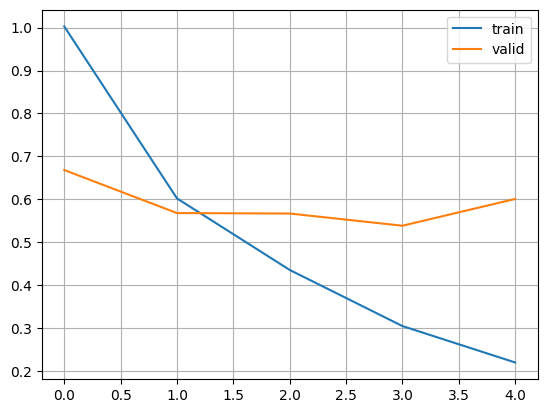

In [20]:
import matplotlib.pyplot as plt

h = history.cpu()
h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()

In [21]:
f_m = best_model.cpu()

f_m.eval()
with torch.no_grad():
  is_first = True
  for x_tensor, y_tensor in test_loader:
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred_prob = f_m(x_tensor)
    pred = torch.argmax(pred_prob, dim=-1) # class 수 만큼 나오므로 가장 큰 확률의 index를 얻어야함.

    # print(y_tensor.numpy().shape)
    if is_first:
      test_pred = pred.numpy().copy()
      test_label = y_tensor.numpy().copy()
      is_first = False
    else:
      test_label = np.concatenate((test_label, y_tensor.numpy()), axis=0)
      test_pred = np.concatenate((test_pred, pred.numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred.shape, test_pred.dtype)

(10000,) int64
(10000,) int64


In [22]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = test_pred
label = test_label

print('Confusion Matrix\n',
      str(confusion_matrix(label,pred))
      )
print(f'Precision           :{np.round(precision_score(label,pred,average=None),2)}')
print(f'Precision (macro)   :{np.round(precision_score(label,pred,average="macro"),2)}')
print(f'Precision (micro)   :{np.round(precision_score(label,pred,average="micro"),2)}')
print(f'Precision (weighted):{np.round(precision_score(label,pred,average="weighted"),2)}')
print(f'Recall              :{np.round(recall_score(label,pred,average=None),2)}')
print(f'Recall    (macro)   :{np.round(recall_score(label,pred,average="macro"),2)}')
print(f'Recall    (micro)   :{np.round(recall_score(label,pred,average="micro"),2)}')
print(f'Recall    (weighted):{np.round(recall_score(label,pred,average="weighted"),2)}')
print(f'F1-score            :{np.round(f1_score(label,pred,average=None),2)}')
print(f'F1-score  (macro)   :{np.round(f1_score(label,pred,average="macro"),2)}')
print(f'F1-score  (micro)   :{np.round(f1_score(label,pred,average="micro"),2)}')
print(f'F1-score  (weighted):{np.round(f1_score(label,pred,average="weighted"),2)}')
print(f'F2-score            :{np.round(fbeta_score(label,pred,beta=2,average=None),2)}')
print(f'F2-score  (macro)   :{np.round(fbeta_score(label,pred,beta=2,average="macro"),2)}')
print(f'F2-score  (micro)   :{np.round(fbeta_score(label,pred,beta=2,average="micro"),2)}')
print(f'F2-score  (weighted):{np.round(fbeta_score(label,pred,beta=2,average="weighted"),2)}')



Confusion Matrix
 [[863  14  30  12  12   3   4  14  37  11]
 [  5 912   2   6   0   2   3   4  13  53]
 [ 32   2 753  34  64  25  57  24   6   3]
 [ 12   9  35 697  48  96  51  29  12  11]
 [ 14   4  50  38 771  23  36  55   8   1]
 [  6   3  21 216  30 643  23  46   6   6]
 [  5   8  26  32  18   9 889   6   2   5]
 [  8   4  18  31  30  16   5 880   2   6]
 [ 56  30   8   5   3   0   2   4 878  14]
 [ 22  62   7   9   2   2   0  21  12 863]]
Precision           :[0.84 0.87 0.79 0.65 0.79 0.79 0.83 0.81 0.9  0.89]
Precision (macro)   :0.82
Precision (micro)   :0.81
Precision (weighted):0.82
Recall              :[0.86 0.91 0.75 0.7  0.77 0.64 0.89 0.88 0.88 0.86]
Recall    (macro)   :0.81
Recall    (micro)   :0.81
Recall    (weighted):0.81
F1-score            :[0.85 0.89 0.77 0.67 0.78 0.71 0.86 0.84 0.89 0.87]
F1-score  (macro)   :0.81
F1-score  (micro)   :0.81
F1-score  (weighted):0.81
F2-score            :[0.86 0.9  0.76 0.69 0.77 0.67 0.88 0.87 0.88 0.87]
F2-score  (macro)   :0.81